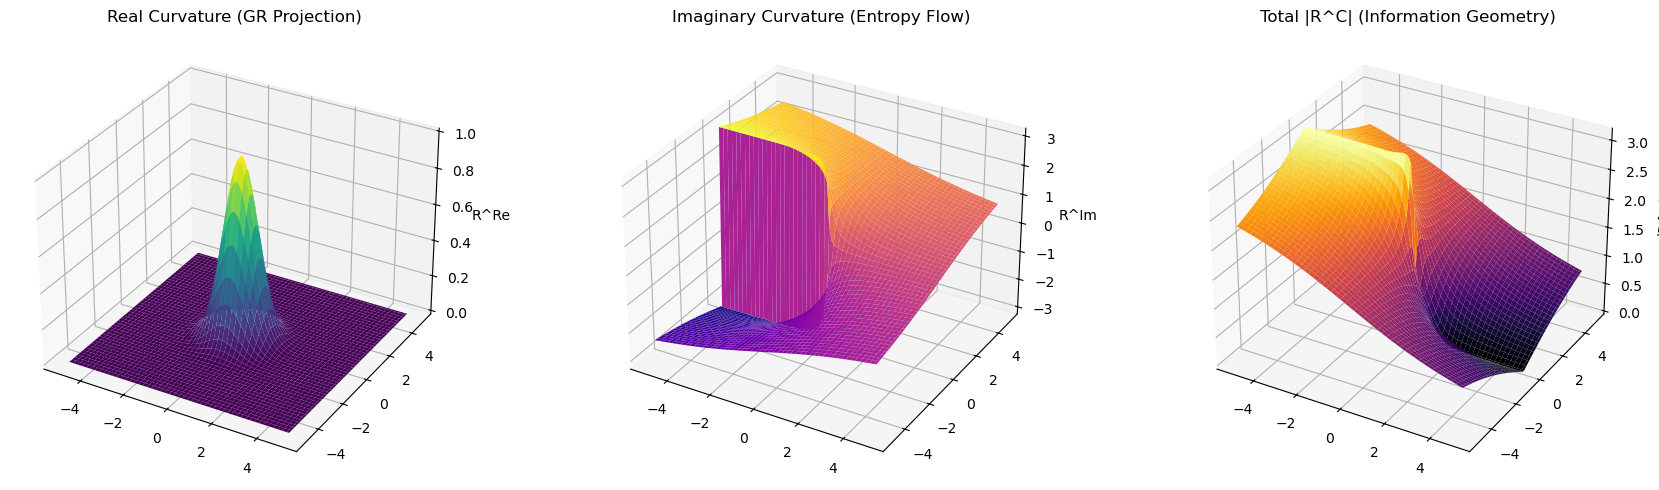

In [2]:
# Appendix A Module
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define simulation grid
grid_size = 100
x = np.linspace(-5, 5, grid_size)
y = np.linspace(-5, 5, grid_size)
X, Y = np.meshgrid(x, y)

# Define a synthetic complexified curvature field (for illustration)
# Real curvature: Gaussian bump, Imaginary curvature: entropy-like radial flow
real_curvature = np.exp(-(X**2 + Y**2))
imag_curvature = np.arctan2(Y, X)  # Angular field representing entropy flux

# Projected (real part) curvature field: what GR "sees"
projected_curvature = real_curvature

# Total magnitude of complexified curvature (for optional visualization)
total_magnitude = np.sqrt(real_curvature**2 + imag_curvature**2)

# Prepare visualizations
fig = plt.figure(figsize=(18, 5))

# Plot 1: Real curvature
ax1 = fig.add_subplot(131, projection='3d')
ax1.plot_surface(X, Y, real_curvature, cmap='viridis')
ax1.set_title("Real Curvature (GR Projection)")
ax1.set_zlabel("R^Re")

# Plot 2: Imaginary curvature (entropy-like)
ax2 = fig.add_subplot(132, projection='3d')
ax2.plot_surface(X, Y, imag_curvature, cmap='plasma')
ax2.set_title("Imaginary Curvature (Entropy Flow)")
ax2.set_zlabel("R^Im")

# Plot 3: Total curvature magnitude
ax3 = fig.add_subplot(133, projection='3d')
ax3.plot_surface(X, Y, total_magnitude, cmap='inferno')
ax3.set_title("Total |R^C| (Information Geometry)")
ax3.set_zlabel("|R^C|")

plt.tight_layout()
plt.show()


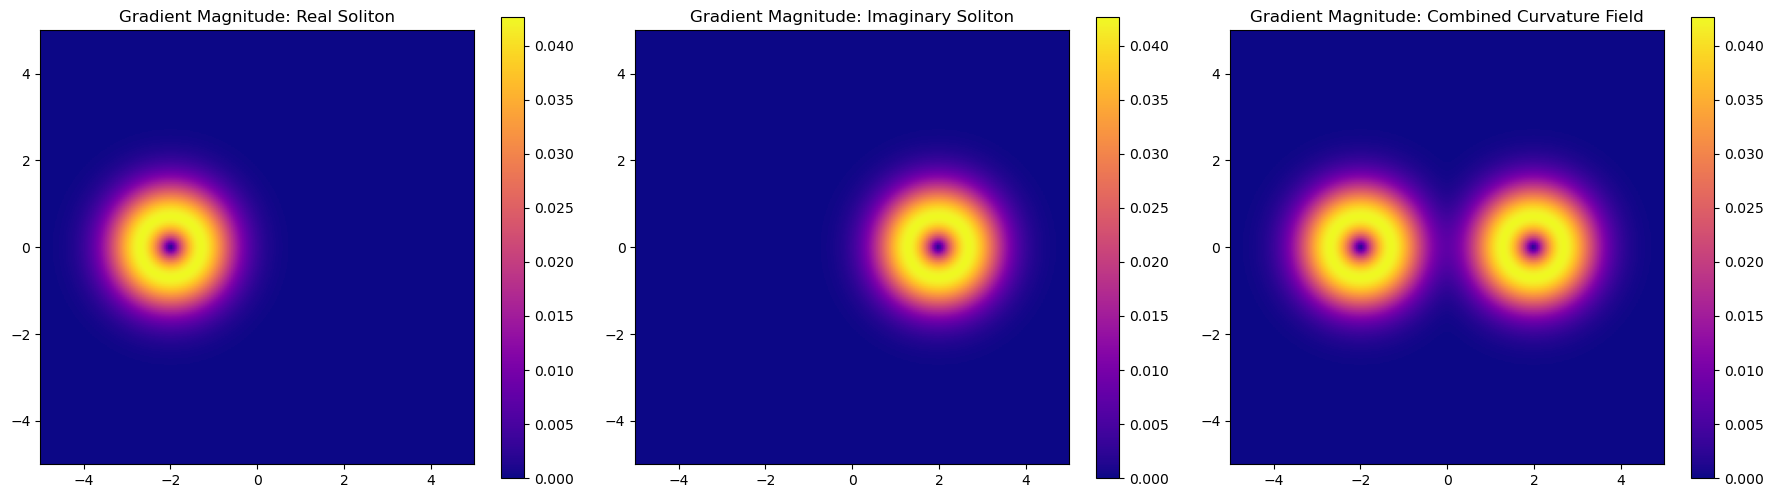

--- Real Gradient ---
Min: 0.00000
Max: 0.04270
Mean: 0.00276
Std: 0.00836

--- Imaginary Gradient ---
Min: 0.00000
Max: 0.04270
Mean: 0.00276
Std: 0.00836

--- Combined Gradient ---
Min: 0.00000
Max: 0.04271
Mean: 0.00552
Std: 0.01118



In [5]:
# Appendix B Module
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter

# Define the grid
x = np.linspace(-5, 5, 200)
y = np.linspace(-5, 5, 200)
X, Y = np.meshgrid(x, y)

# Define real and imaginary soliton components
def real_soliton(x, y):
    return np.exp(-((x+2)**2 + y**2))

def imag_soliton(x, y):
    return np.exp(-((x-2)**2 + y**2))

# Compute fields
R = real_soliton(X, Y)
I = imag_soliton(X, Y)

# Total curvature field from both components
C = R - I  # Could be R + I or abs(R + iI), but here we test interference

# Smoothed for curvature gradient analysis
R_smooth = gaussian_filter(R, sigma=1)
I_smooth = gaussian_filter(I, sigma=1)
C_smooth = gaussian_filter(C, sigma=1)

# Compute gradients (entropy flux proxy)
grad_R = np.gradient(R_smooth)
grad_I = np.gradient(I_smooth)
grad_C = np.gradient(C_smooth)

mag_grad_R = np.sqrt(grad_R[0]**2 + grad_R[1]**2)
mag_grad_I = np.sqrt(grad_I[0]**2 + grad_I[1]**2)
mag_grad_C = np.sqrt(grad_C[0]**2 + grad_C[1]**2)

# Plot the gradient magnitudes
fig, axs = plt.subplots(1, 3, figsize=(18, 5))
im0 = axs[0].imshow(mag_grad_R, extent=(-5, 5, -5, 5), origin='lower', cmap='plasma')
axs[0].set_title('Gradient Magnitude: Real Soliton')
fig.colorbar(im0, ax=axs[0])

im1 = axs[1].imshow(mag_grad_I, extent=(-5, 5, -5, 5), origin='lower', cmap='plasma')
axs[1].set_title('Gradient Magnitude: Imaginary Soliton')
fig.colorbar(im1, ax=axs[1])

im2 = axs[2].imshow(mag_grad_C, extent=(-5, 5, -5, 5), origin='lower', cmap='plasma')
axs[2].set_title('Gradient Magnitude: Combined Curvature Field')
fig.colorbar(im2, ax=axs[2])

plt.tight_layout()
plt.show()

# Statistical summaries
def stats(name, arr):
    print(f"--- {name} ---")
    print(f"Min: {arr.min():.5f}")
    print(f"Max: {arr.max():.5f}")
    print(f"Mean: {arr.mean():.5f}")
    print(f"Std: {arr.std():.5f}")
    print()

stats("Real Gradient", mag_grad_R)
stats("Imaginary Gradient", mag_grad_I)
stats("Combined Gradient", mag_grad_C)


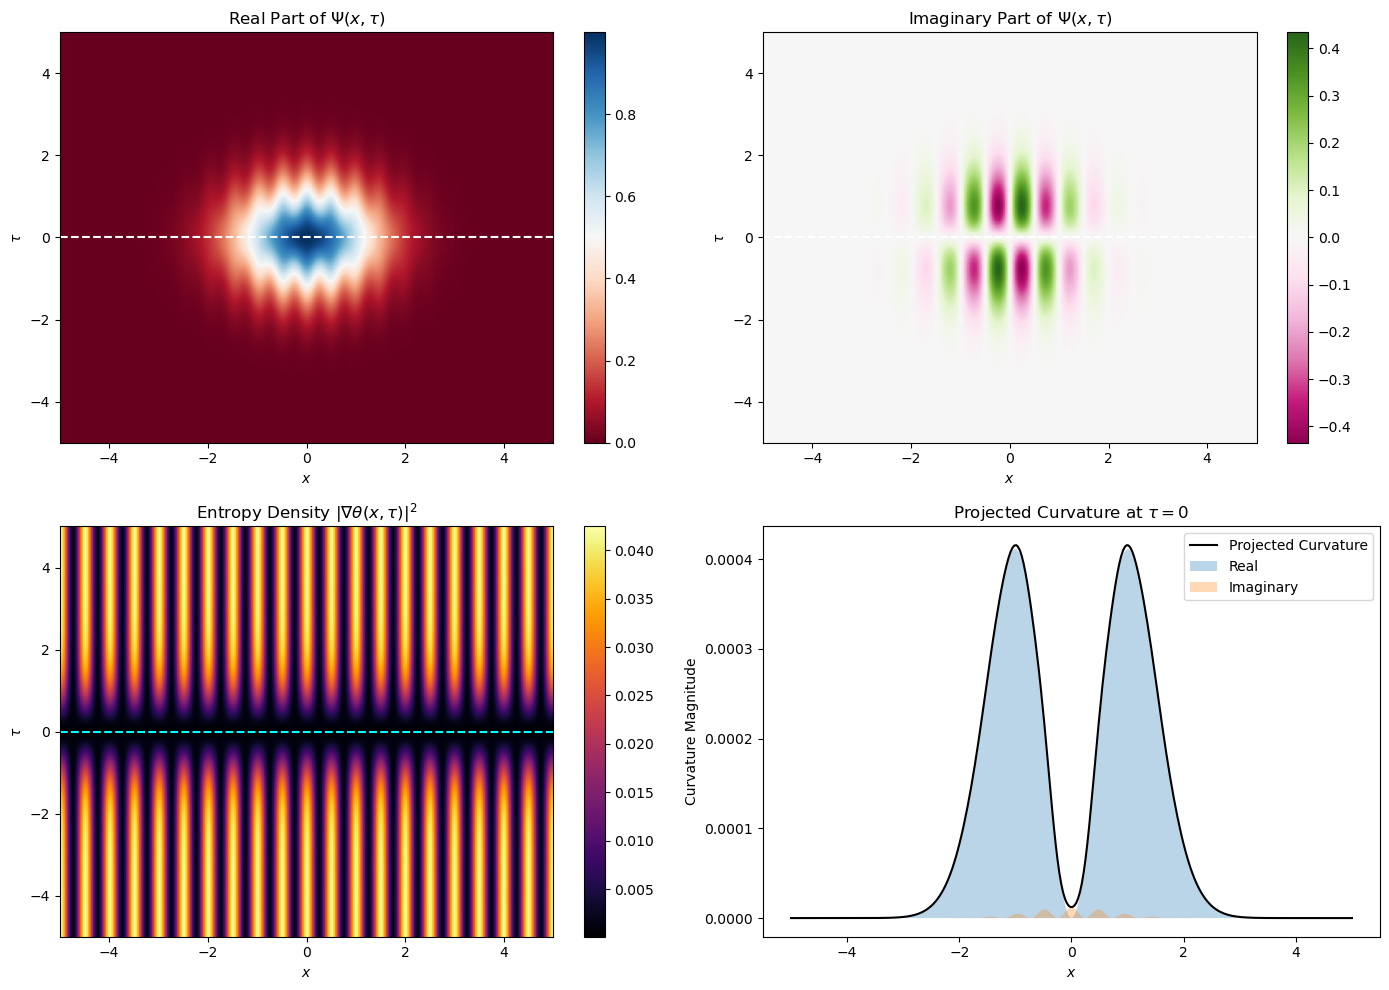

--- Real Gradient ---
Min: 0.00000
Max: 0.00041
Mean: 0.00010
Std: 0.00014

--- Imaginary Gradient ---
Min: 0.00000
Max: 0.00001
Mean: 0.00000
Std: 0.00000

--- Combined Gradient ---
Min: 0.00000
Max: 0.00042
Mean: 0.00010
Std: 0.00014


In [4]:
# Appendix C Module
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from scipy.ndimage import gaussian_filter

# Grid setup
x = np.linspace(-5, 5, 300)
tau = np.linspace(-5, 5, 300)
X, T = np.meshgrid(x, tau)

# Amplitude and Phase Definitions
A = np.exp(-0.5 * (X**2 + T**2))  # Gaussian envelope
theta = np.sin(2 * np.pi * X) * np.tanh(T)  # Entropy-aligned phase field

# Complex field
Psi = A * np.exp(1j * theta)
Re_Psi = np.real(Psi)
Im_Psi = np.imag(Psi)

# Entropy density (gradient magnitude of phase field)
entropy_density = gaussian_filter(
    np.abs(np.gradient(theta, axis=0))**2 + np.abs(np.gradient(theta, axis=1))**2, sigma=1
)

# Projection at tau = 0
tau_index = np.argmin(np.abs(tau))
Psi_proj = Psi[tau_index, :]
curvature_real = np.abs(np.gradient(np.real(Psi_proj)))**2
curvature_imag = np.abs(np.gradient(np.imag(Psi_proj)))**2
curvature_combined = curvature_real + curvature_imag

# Plotting
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Real part of Psi
im0 = axs[0, 0].imshow(Re_Psi, extent=[x.min(), x.max(), tau.min(), tau.max()],
                       aspect='auto', origin='lower', cmap='RdBu')
axs[0, 0].set_title(r"Real Part of $\Psi(x, \tau)$")
axs[0, 0].set_xlabel(r"$x$")
axs[0, 0].set_ylabel(r"$\tau$")
axs[0, 0].axhline(0, color='white', linestyle='--')
plt.colorbar(im0, ax=axs[0, 0])

# Imaginary part of Psi
im1 = axs[0, 1].imshow(Im_Psi, extent=[x.min(), x.max(), tau.min(), tau.max()],
                       aspect='auto', origin='lower', cmap='PiYG')
axs[0, 1].set_title(r"Imaginary Part of $\Psi(x, \tau)$")
axs[0, 1].set_xlabel(r"$x$")
axs[0, 1].set_ylabel(r"$\tau$")
axs[0, 1].axhline(0, color='white', linestyle='--')
plt.colorbar(im1, ax=axs[0, 1])

# Entropy density
im2 = axs[1, 0].imshow(entropy_density, extent=[x.min(), x.max(), tau.min(), tau.max()],
                       aspect='auto', origin='lower', cmap='inferno')
axs[1, 0].set_title(r"Entropy Density $|\nabla \theta(x, \tau)|^2$")
axs[1, 0].set_xlabel(r"$x$")
axs[1, 0].set_ylabel(r"$\tau$")
axs[1, 0].axhline(0, color='cyan', linestyle='--')
plt.colorbar(im2, ax=axs[1, 0])

# Emergent curvature from projection
axs[1, 1].plot(x, curvature_combined, label='Projected Curvature', color='black')
axs[1, 1].fill_between(x, curvature_real, alpha=0.3, label='Real')
axs[1, 1].fill_between(x, curvature_imag, alpha=0.3, label='Imaginary')
axs[1, 1].set_title(r"Projected Curvature at $\tau=0$")
axs[1, 1].set_xlabel(r"$x$")
axs[1, 1].set_ylabel("Curvature Magnitude")
axs[1, 1].legend()

plt.tight_layout()
plt.show()

# Stats printout
print("--- Real Gradient ---")
print(f"Min: {curvature_real.min():.5f}")
print(f"Max: {curvature_real.max():.5f}")
print(f"Mean: {curvature_real.mean():.5f}")
print(f"Std: {curvature_real.std():.5f}")

print("\n--- Imaginary Gradient ---")
print(f"Min: {curvature_imag.min():.5f}")
print(f"Max: {curvature_imag.max():.5f}")
print(f"Mean: {curvature_imag.mean():.5f}")
print(f"Std: {curvature_imag.std():.5f}")

print("\n--- Combined Gradient ---")
print(f"Min: {curvature_combined.min():.5f}")
print(f"Max: {curvature_combined.max():.5f}")
print(f"Mean: {curvature_combined.mean():.5f}")
print(f"Std: {curvature_combined.std():.5f}")
